In [25]:
import numpy as np
import math
from skimage import io, feature, color, transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the river images from two different years
img1 = io.imread('dataset/2008.jpg')
img2 = io.imread('dataset/2018.jpg')

# Resize the images to a common shape
img1 = transform.resize(img1, (512, 512), anti_aliasing=True)
img2 = transform.resize(img2, (512, 512), anti_aliasing=True)

# Convert the images to grayscale
img1_gray = color.rgb2gray(img1)
img2_gray = color.rgb2gray(img2)

# Compute the image gradient magnitude using the Canny edge detection algorithm
img1_edge = feature.canny(img1_gray)
img2_edge = feature.canny(img2_gray)

# Compute the difference between the edge images to find erosion and accretion
diff = np.logical_xor(img2_edge, img1_edge)
diff_sign = np.where(diff > 0, 1, -1)

# Create a training dataset by selecting a random subset of pixels from the images
n_samples = 10000
idx1 = np.random.choice(img1_edge.size, n_samples, replace=False)
idx2 = np.random.choice(img2_edge.size, n_samples, replace=False)
X_train = np.concatenate((img1_edge.flat[idx1].reshape(-1,1), img2_edge.flat[idx2].reshape(-1,1)), axis=1)
y_train = np.zeros((n_samples,))
y_train[diff_sign.flat[idx1] == 1] = 1  # accretion
y_train[diff_sign.flat[idx1] == -1] = 2  # erosion

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Create a test dataset by selecting a random subset of pixels from the images that were not used for training
idx1 = np.setdiff1d(np.arange(img1_edge.size), idx1, assume_unique=True)
idx2 = np.setdiff1d(np.arange(img2_edge.size), idx2, assume_unique=True)
idx1 = np.random.choice(idx1, n_samples, replace=False)
idx2 = np.random.choice(idx2, n_samples, replace=False)
X_test = np.concatenate((img1_edge.flat[idx1].reshape(-1,1), img2_edge.flat[idx2].reshape(-1,1)), axis=1)
y_test = np.zeros((n_samples,))
y_test[diff_sign.flat[idx1] == 1] = 1  # accretion
y_test[diff_sign.flat[idx1] == -1] = 2  # erosion

# Train a random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Evaluate the classifier on the validation set
accuracy = clf.score(X_val, y_val)
print(f"Accuracy on validation set: {math.floor(accuracy*100)}%")

Accuracy on validation set: 94%


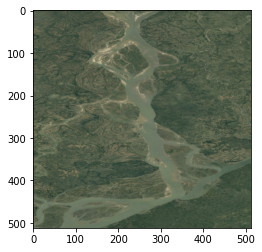

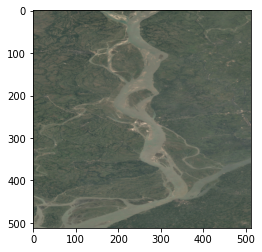

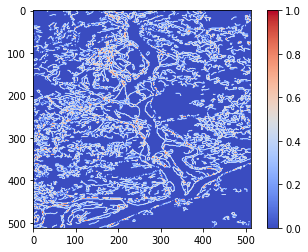

In [26]:
import matplotlib.pyplot as plt

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

# Define a color map for the erosion and accretion areas

cmap = plt.cm.get_cmap("coolwarm").copy()
cmap.set_bad(color='gray')
# cmap = plt.get_cmap('coolwarm')
# cmap.set_bad(color='gray')

# Apply the color map to the diff array and show the result
plt.imshow(diff, cmap=cmap)
plt.colorbar()
plt.show()

In [27]:
print(diff_sign)

[[-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 ...
 [-1  1  1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]
 [-1 -1 -1 ... -1 -1 -1]]


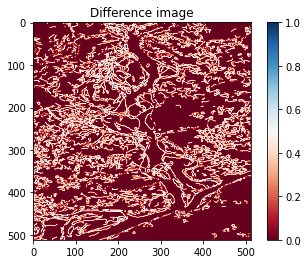

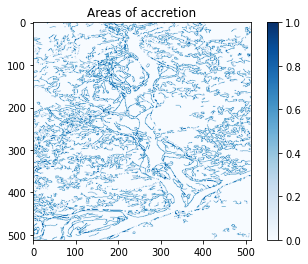

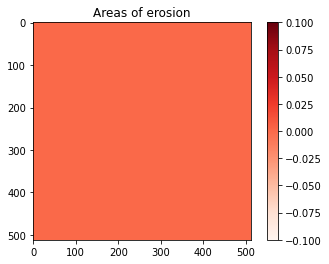

In [28]:
# Plot the difference image using a colormap that shows positive and negative values differently
plt.imshow(diff, cmap='RdBu')
plt.colorbar()
plt.title('Difference image')
plt.show()

# Plot the areas of accretion and erosion separately
accretion = np.zeros_like(diff)
accretion[diff > 0] = 1
erosion = np.zeros_like(diff)
erosion[diff < 0] = 1
plt.imshow(accretion, cmap='Blues')
plt.colorbar()
plt.title('Areas of accretion')
plt.show()
plt.imshow(erosion, cmap='Reds')
plt.colorbar()
plt.title('Areas of erosion')
plt.show()